In [1]:
import os, sys, glob, time
import itertools

%matplotlib inline
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import astropy.io.ascii as at
from astropy.io import fits
import astropy.units as u
from astropy import table
from astropy.table import join,vstack,Table
from astropy.coordinates import SkyCoord

import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=0, vmax=5)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

from analyze_cluster_output import colors, shapes
from plot_periods import plot_periodcolor_histogram
from tau_sq import SpinModel, PeriodMassDistribution

In [2]:
clusters = ["IC_2391","Collinder_135","NGC_2451A","NGC_2547","IC_2602"]
dates = ["2021-06-22","2021-06-18","2021-06-21","2021-06-21","2021-07-02"]

<AxesSubplot:xlabel='Mass (M$_\\odot$)', ylabel='Period (d)'>

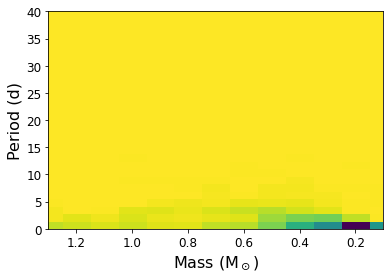

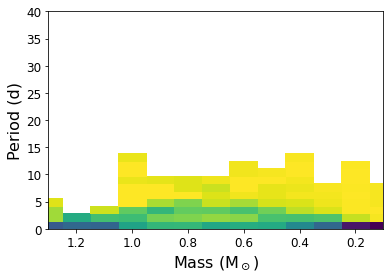

In [3]:
sm = SpinModel("UpSco_Mattea2022",30,"linear")
sm.plot_hist()
sm.normalize()
sm.add_mask()
sm.plot_hist()

init_type KDE; normalization already completed
[[0.35186291270387204 0.3056671665772376 0.2204064801313497
  0.17073319641227627 0.1544082392481076 0.1556568260022346
  0.15543607031324666 0.13958322810825138 0.16556452864119647
  0.10264396875724018 0.15286115780365558 0.2041778487330032
  0.16253181466391978]
 [0.12449757530521977 0.1494603028578293 0.1461044524324299
  0.13245012854200827 0.11891814749479589 0.101893888919216
  0.09911481677177057 0.09387307567864574 0.0830853060339854
  0.12273969187065419 0.13241949779164594 0.1371424385174816
  0.14868443492535585]
 [0.037978710950060265 0.0539449391370842 0.07466092943791565
  0.08001412967069313 0.08091182724338858 0.07447627021369835
  0.07420361631870233 0.07170282241132632 0.06768538035908708
  0.09364126720846785 0.08912563934432463 0.08404775834302843
  0.08900218073673158]
 [0.01535073107615312 0.022023149207292553 0.04005856441870847
  0.05089130451324431 0.057928309486870784 0.0566990485278758
  0.056397320675391 0.0583

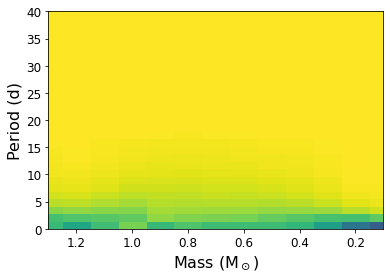

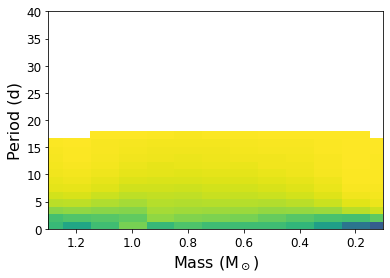

In [5]:
sm = SpinModel("WideHat8Myr_Mattea2022",10,"linear",init_type="kde")
sm.plot_hist()
sm.normalize()
sm.add_mask()
sm.plot_hist()
print(sm.img)

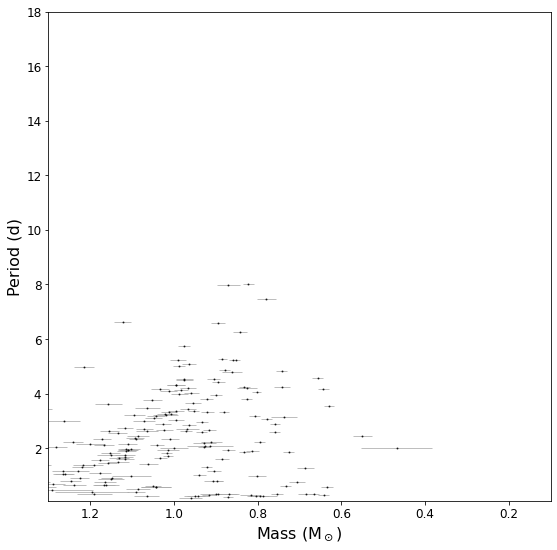

In [7]:
pmd = PeriodMassDistribution(max_q=0,include_blends=False,include_lit=False)
ax = pmd.plot_obs(plot_errors=True)

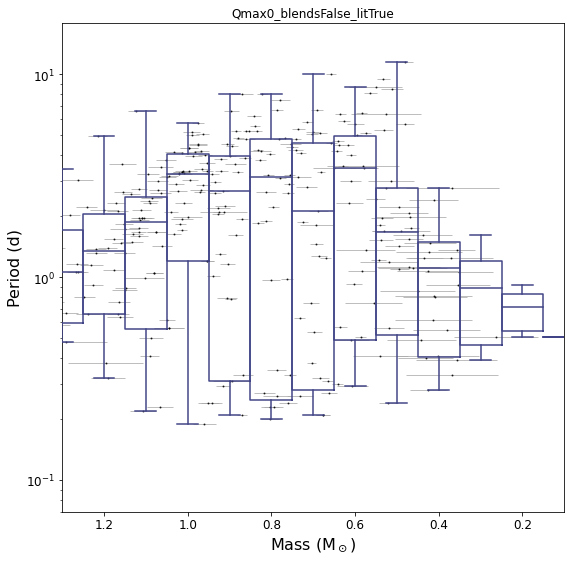

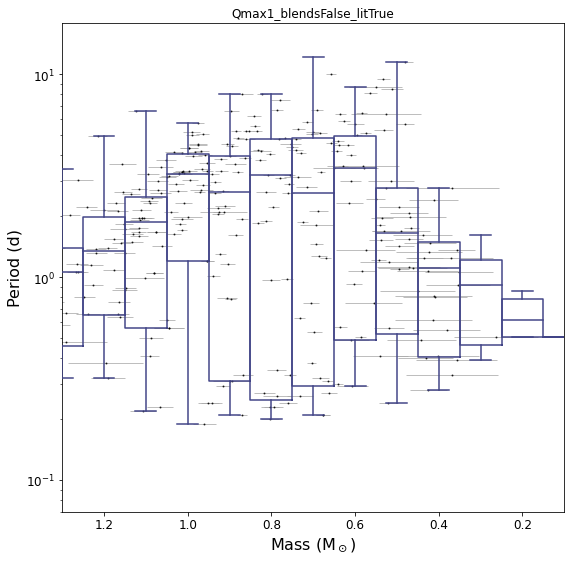

In [8]:
pmd = PeriodMassDistribution(max_q=0,include_blends=False,include_lit=True)
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,14))
ax = pmd.plot_obs(plot_errors=True)
_ = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.param_string)
ax.set_yscale("log")

pmd1 = PeriodMassDistribution(max_q=1,include_blends=False,include_lit=True)
pmd1.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,14))
ax1 = pmd.plot_obs(plot_errors=True)
_ = pmd1.plot_period_perc(ax1)
_ = ax1.set_title(pmd1.param_string)
ax1.set_yscale("log")

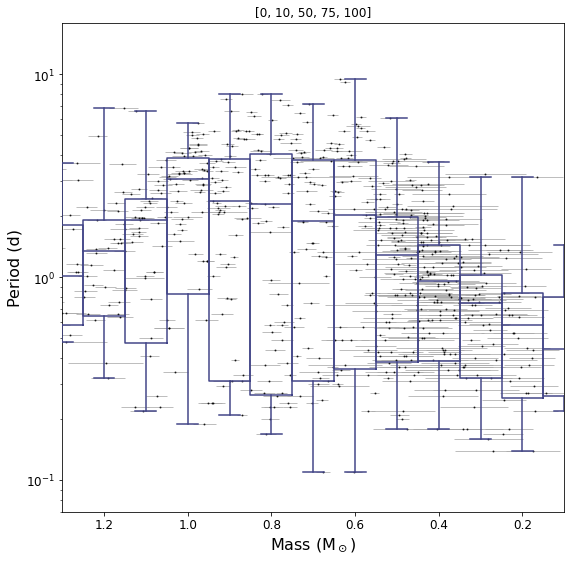

In [9]:
pmd = PeriodMassDistribution()
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,14))
ax = pmd.plot_obs(plot_errors=True)
ax = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.percentiles)
ax.set_yscale("log")

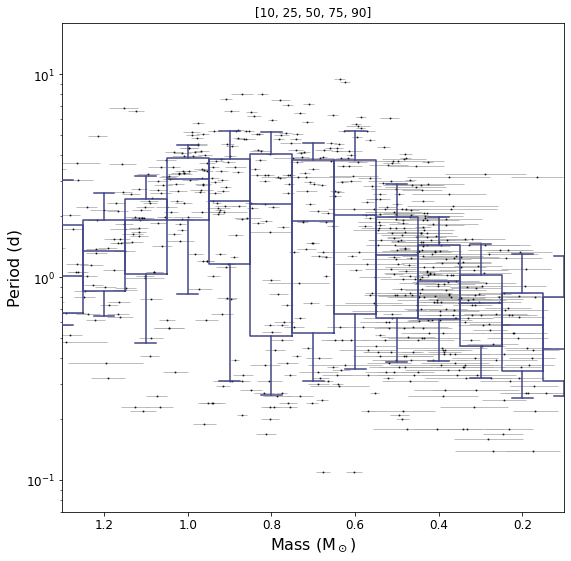

In [10]:
pmd = PeriodMassDistribution()
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,14),percentiles=[10,25,50,75,90])
ax = pmd.plot_obs(plot_errors=True)
ax = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.percentiles)
ax.set_yscale("log")

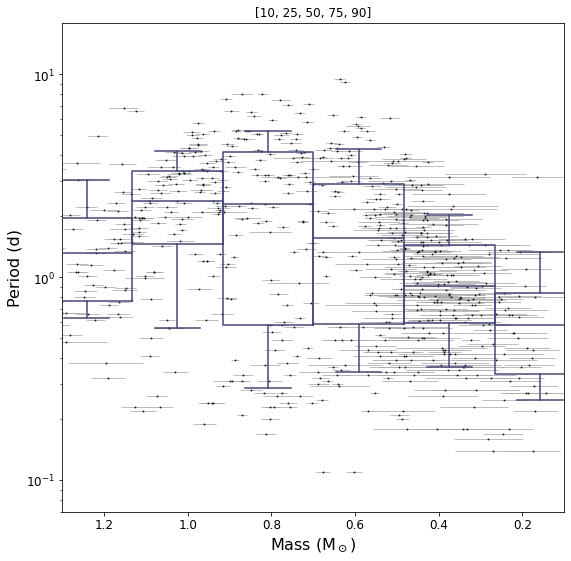

In [11]:
pmd = PeriodMassDistribution()
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,7),percentiles=[10,25,50,75,90])
ax = pmd.plot_obs(plot_errors=True)
ax = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.percentiles)
ax.set_yscale("log")

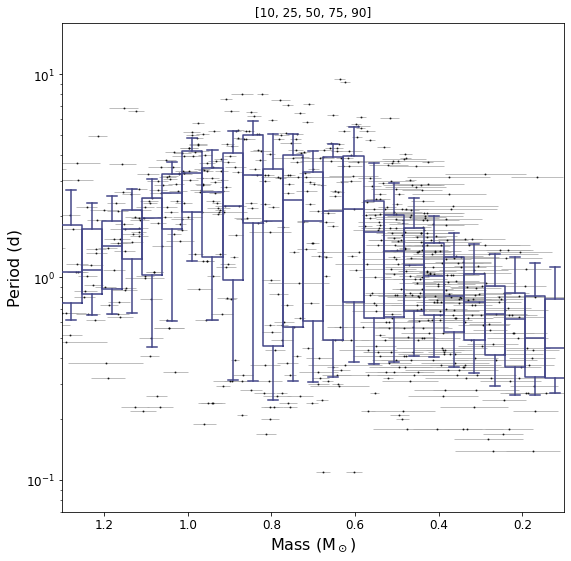

In [12]:
pmd = PeriodMassDistribution()
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,28),percentiles=[10,25,50,75,90])
ax = pmd.plot_obs(plot_errors=True)
ax = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.percentiles)
ax.set_yscale("log")

UpSco_Mattea2015
UpSco_Mattea2022
UpSco_ZeroTorque


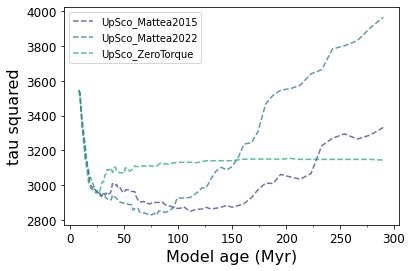

In [11]:
model_names = ["UpSco_Mattea2015","UpSco_Mattea2022","UpSco_ZeroTorque"]
period_scale = "linear"

pmd = PeriodMassDistribution()

fig = plt.figure()
fig.patch.set_facecolor('w')
fig.patch.set_alpha(1.0)
for j,model in enumerate(model_names):
    print(model)
    models = glob.glob(os.path.expanduser(f"~/Dropbox/Models/{model}/{model}*Myr.txt"))
    # print(models)

    model_ages = np.sort([int(mod.split("_")[-1][:5]) for mod in models])
    # print(model_ages)
    
    model_ages = model_ages[model_ages<=300]
    
    all_tau_sq = np.zeros(len(model_ages))
    for i, age in enumerate(model_ages):
        sm = SpinModel(model,age,period_scale)
        
        # Normalize the model and calculate tau-squared
        sm.normalize()
        sm.add_mask()
        sm.calc_tau_sq(pmd)

        all_tau_sq[i] = sm.tau_sq

    plt.plot(model_ages,all_tau_sq,'--',label=model,color=mapper.to_rgba(j+1),alpha=0.75)
    plt.legend(loc=2)
    plt.xlabel("Model age (Myr)",fontsize=16)
    plt.ylabel("tau squared",fontsize=16)
#     plt.title(model,fontsize=14)
    
    ax = plt.gca()
    ax.tick_params(labelsize=12)
    ax.set_xticks(np.arange(0,300,25),minor=True)
plt.savefig(f"plots/tausq_ZAMS_UpSco.png",bbox_inches="tight",dpi=600)

WideHat8Myr_Mattea2015
WideHat8Myr_Mattea2022
WideHat8Myr_ZeroTorque


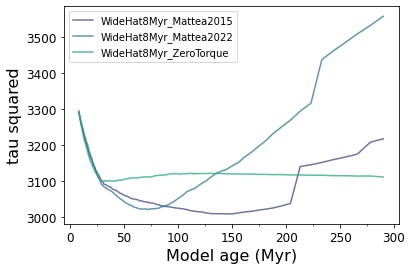

In [12]:
model_names = ["WideHat8Myr_Mattea2015","WideHat8Myr_Mattea2022","WideHat8Myr_ZeroTorque"]
period_scale = "linear"

pmd = PeriodMassDistribution()

fig = plt.figure()
fig.patch.set_facecolor('w')
fig.patch.set_alpha(1.0)
for j,model in enumerate(model_names):
    print(model)
    models = glob.glob(os.path.expanduser(f"~/Dropbox/Models/{model}/{model}*Myr.txt"))
    # print(models)

    model_ages = np.sort([int(mod.split("_")[-1][:5]) for mod in models])
    # print(model_ages)
    
    model_ages = model_ages[model_ages<=300]
    
    all_tau_sq = np.zeros(len(model_ages))
    for i, age in enumerate(model_ages):
        sm = SpinModel(model,age,period_scale)
        
        # Normalize the model and calculate tau-squared
        sm.normalize()
        sm.add_mask()
        sm.calc_tau_sq(pmd)

        all_tau_sq[i] = sm.tau_sq

    plt.plot(model_ages,all_tau_sq,'-',label=model,color=mapper.to_rgba(j+1),alpha=0.75)
    plt.legend(loc=2)
    plt.xlabel("Model age (Myr)",fontsize=16)
    plt.ylabel("tau squared",fontsize=16)
#     plt.title(model,fontsize=14)
    
    ax = plt.gca()
    ax.tick_params(labelsize=12)
    ax.set_xticks(np.arange(0,300,25),minor=True)
plt.savefig(f"plots/tausq_ZAMS_WideHat8Myr.png",bbox_inches="tight",dpi=600)

In [14]:
display_names = {"UpSco_Mattea2015":"Matt+15; UpSco initialization",
                 "UpSco_Mattea2022":"Matt+in prep; UpSco initialization",
                 "UpSco_ZeroTorque":"Zero Torque; UpSco initialization",
                 "WideHat8Myr_Mattea2015":"Matt+15; uniform initialization",
                 "WideHat8Myr_Mattea2022":"Matt+in prep; uniform initialization",
                 "WideHat8Myr_ZeroTorque":"Zero Torque; uniform initialization"}
model_names = ["UpSco_Mattea2015","UpSco_Mattea2022","UpSco_ZeroTorque",
               "WideHat8Myr_Mattea2015","WideHat8Myr_Mattea2022","WideHat8Myr_ZeroTorque"]
nmod = 6
nage = 118


In [210]:
def run_all_models(max_q=0,include_blends=True,include_lit=False,
                   period_scale = "linear",output_filebase="tausq_ZAMS_Compare",
                   models_to_plot=model_names,zoom_ymax=None):
# plot_frames = True

    ttab = Table(np.zeros(nmod*nage).reshape(nage,nmod),names=model_names)

    pmd = PeriodMassDistribution(max_q,include_blends,include_lit)
    # TODO: make it check for the matching output csv and skip straight to plotting if found

    fig = plt.figure()
    fig.patch.set_facecolor('w')
    fig.patch.set_alpha(1.0)
    ax = plt.subplot(111)

    fig2 = plt.figure()
    for j,model in enumerate(models_to_plot):
        
        print(model)

        if "WideHat" in model:
            init_type="kde"
        else:
            init_type="cluster"

        models = glob.glob(os.path.expanduser(f"~/Dropbox/Models/{model}/{model}*Myr.txt"))
        # print(models)

        model_ages = np.sort([int(mod.split("_")[-1][:5]) for mod in models])
        # print(model_ages)

        model_ages = model_ages#[model_ages<=300]

        all_tau_sq = np.zeros(len(model_ages))
        for i, age in enumerate(model_ages):
    #         print(i,age)

            sm = SpinModel(model,age,period_scale,init_type=init_type)

            # Normalize the model and calculate tau-squared
            if init_type!="kde":
                sm.normalize()
            sm.add_mask()
            sm.calc_tau_sq(pmd)

            all_tau_sq[i] = sm.tau_sq

    #         if plot_frames:
    #             if ax2 is None:
    #                 ax2 = sm.plot_hist(fig=fig2)
    #             else:
    #                 ax2 = sm.plot_hist(ax=ax2)
    #             pmd.plot_obs(ax2)
    #             fig2.savefig(f"plots/model_frames/tausq_{model}_{period_scale}_{age:05d}Myr_ZAMS.png",bbox_inches="tight",dpi=600)
    #             ax2.clear()


        if "UpSco" in model:
            ls = "--"
        else:
            ls = "-"
        ax.plot(model_ages,all_tau_sq,ls,label=display_names[model],color=mapper.to_rgba((j % 3)+1),alpha=0.75)
        ax.legend(loc=2)
        ax.set_xlabel("Model age (Myr)",fontsize=16)
        ax.set_ylabel("tau squared",fontsize=16)

        ax.tick_params(labelsize=12)
        ax.set_xticks(np.arange(0,300,25),minor=True)

        ttab[model] = all_tau_sq

        if j==0:
            ttab["Age(Myr)"] = model_ages

    outfilename = f"{output_filebase}_{pmd.param_string}"
    fig.savefig(f"plots/{outfilename}.png",bbox_inches="tight",dpi=600)

    ax.set_xlim(0,300)
    ylims = ax.get_ylim()
    if zoom_ymax is None:
        ymax = max(ttab[models_to_plot[-1]][ttab["Age(Myr)"]<350])
    else:
        ymax = zoom_ymax
    ax.set_ylim(ylims[0],ymax)
    fig.savefig(f"plots/{outfilename}_zoom.png",bbox_inches="tight",dpi=600)


    ttab.write(f"tables/{outfilename}.csv",delimiter=",",overwrite=True)

WideHat8Myr_Mattea2015
WideHat8Myr_Mattea2022
WideHat8Myr_ZeroTorque
WideHat8Myr_Mattea2015
WideHat8Myr_Mattea2022
WideHat8Myr_ZeroTorque
WideHat8Myr_Mattea2015
WideHat8Myr_Mattea2022
WideHat8Myr_ZeroTorque


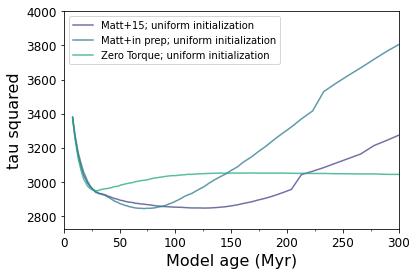

<Figure size 432x288 with 0 Axes>

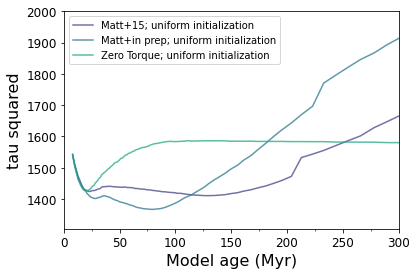

<Figure size 432x288 with 0 Axes>

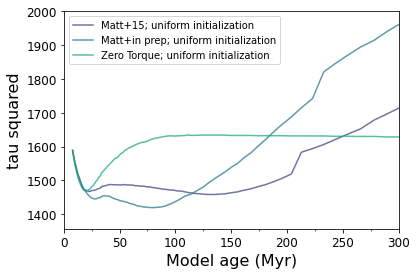

<Figure size 432x288 with 0 Axes>

In [212]:
# Original run
run_all_models(max_q=0,models_to_plot=model_names[3:],
               output_filebase="tausq_ZAMS_Compare_Widehat",zoom_ymax=4000)

# Replace blends with literature
# Only q=0
run_all_models(max_q=0,include_blends=False,include_lit=True,
               period_scale = "linear",output_filebase="tausq_ZAMS_Compare_Widehat",
               models_to_plot=model_names[3:],zoom_ymax=2000)
# allow q=1
run_all_models(max_q=1,include_blends=False,include_lit=True,
               period_scale = "linear",output_filebase="tausq_ZAMS_Compare_Widehat",
               models_to_plot=model_names[3:],zoom_ymax=2000)

In [15]:
# Find all the model ages I have
# model_year = 2022


def plot_all_models(max_q=0,include_blends=True,include_lit=False,
                    period_scale = "linear",models_to_plot=model_names):
    pmd = PeriodMassDistribution(max_q,include_blends,include_lit)

    plt.figure()
#     for j,model in enumerate(model_names):
    for j,model in enumerate(models_to_plot):
        print(model)

        if "WideHat" in model:
            init_type="kde"
        else:
            init_type="cluster"

        models = glob.glob(os.path.expanduser(f"~/Dropbox/Models/{model}/{model}*Myr.txt"))

        model_ages = np.sort([int(mod.split("_")[-1][:5]) for mod in models])
        # print(model_ages)

        model_ages = model_ages[(model_ages<=150) & (model_ages>=0)]

        for i, age in enumerate(model_ages):
        #     print("\n",age)
            sm = SpinModel(model,age,period_scale,init_type=init_type)
            if j==0 and i==0:
                pmd.select_obs(sm)

            # Normalize the model and calculate tau-squared
            sm.normalize()
            sm.add_mask()
            sm.calc_tau_sq(pmd)

    #         print(model,age,np.max(sm.img))
    #         print(sm.img)


            # Plot
            ax = sm.plot_hist()
            pmd.plot_obs(ax)
            ax.set_ylim(0,14)
            plt.savefig(f"plots/model_frames/tausq_{model}_{pmd.param_string}_{period_scale}_{age:05d}Myr_ZAMS.png",bbox_inches="tight",dpi=600)
            plt.close()


In [16]:
# Original run
plot_all_models(max_q=0,models_to_plot=["WideHat8Myr_Mattea2015","WideHat8Myr_Mattea2022"])

# Replace blends with literature
# Only q=0
plot_all_models(max_q=0,include_blends=False,include_lit=True,
                period_scale = "linear",models_to_plot=["WideHat8Myr_Mattea2015","WideHat8Myr_Mattea2022"])
# # allow q=1
# plot_all_models(max_q=1,include_blends=False,include_lit=True,
#                 period_scale = "linear",models_to_plot=["WideHat8Myr_Mattea2015","WideHat8Myr_Mattea2022"])


WideHat8Myr_Mattea2015
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already 

init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE; normalization already completed
init_type KDE

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Testing Angie's KDE initialization

In [18]:
# kde_dir = os.path.expanduser("~/Dropbox/Models/UpSco_KDE_init/")
models = glob.glob(os.path.expanduser(f"~/Dropbox/Models/UpSco_KDE_init/*.txt"))

model_tables = []
for mfile in models:
    temp_tab = at.read(mfile)
    mass = float(mfile.split("/")[-1][:3])
    temp_tab["Mass"] = np.ones(len(temp_tab))*mass
    model_tables.append(temp_tab)
mod = vstack(model_tables)

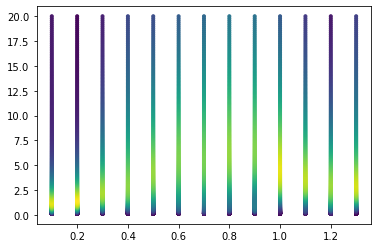

In [19]:
plt.scatter(mod["Mass"],mod["Period"],marker=".",c=mod["Prob"])

In [20]:
period_bins = np.linspace(0,40,30)
mass_bins = np.linspace(0.05,1.35,14)
dPdM = np.diff(period_bins)[0] * np.diff(mass_bins)[0]

In [21]:
hist, xedges, yedges = np.histogram2d(mod["Mass"],mod["Period"],weights=mod["Prob"],density=True,
                                     bins=[mass_bins,period_bins])
img = hist.T

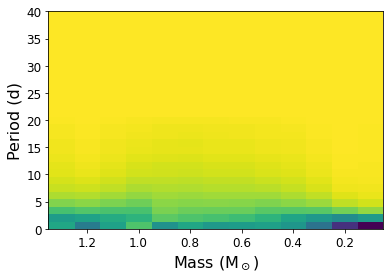

In [22]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlim(1.35,0.05)
ax.tick_params(labelsize=12)
ax.set_xlabel(r"Mass (M$_\odot$)", fontsize=16)
ax.set_ylabel("Period (d)", fontsize=16)            
ax.patch.set_facecolor('w')
ax.patch.set_alpha(1.0)
fig.patch.set_facecolor('w')
fig.patch.set_alpha(1.0)
            
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, img,cmap="viridis_r")


In [23]:
np.sum(img)

7.249999999999999

In [24]:
np.sum(img[:,0]*np.diff(period_bins))

0.7692307692307693

In [25]:
1/13

0.07692307692307693

In [26]:
np.sum(img*dPdM)

1.0

In [28]:
np.max(img)

0.3083432346658118

# Demo PMD/model plots for the CS poster

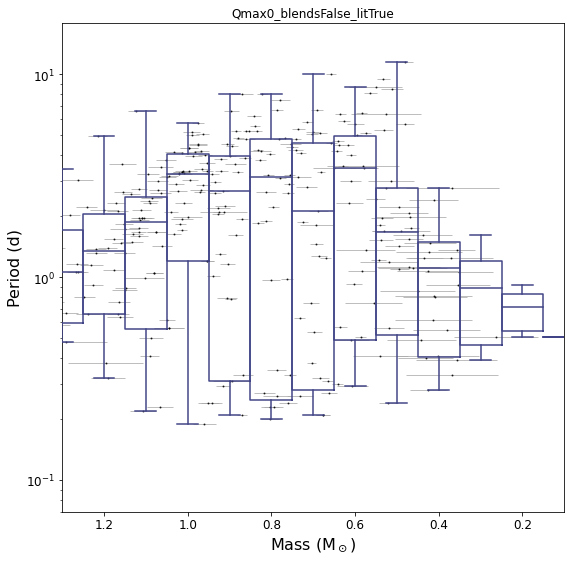

In [185]:
pmd = PeriodMassDistribution(max_q=0,include_blends=False,include_lit=True)
pmd.calc_mass_percentiles(mass_bins=np.linspace(0.05,1.35,14))
ax = pmd.plot_obs(plot_errors=True)
_ = pmd.plot_period_perc(ax)
_ = ax.set_title(pmd.param_string)
ax.set_yscale("log")

likelihood 4.925922629861668e-307


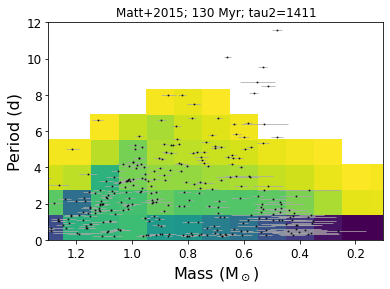

In [216]:
sm = SpinModel("WideHat8Myr_Mattea2015",130,"linear",
               init_type="kde")
pmd.select_obs(sm)

# Normalize the model and calculate tau-squared
# sm.normalize()
sm.add_mask()
sm.calc_tau_sq(pmd)

# Plot
ax = sm.plot_hist()
pmd.plot_obs(ax)
ax.set_ylim(0,12)

ax.set_title(f"Matt+2015; 130 Myr; tau2={sm.tau_sq:.0f}")
plt.savefig(f"plots/tausq_WideHat8Myr_Mattea2015_{pmd.param_string}_linear_00130Myr_ZAMS.png",bbox_inches="tight",dpi=600)

like = np.exp(-0.5*sm.tau_sq)
print(f"likelihood {like}")

likelihood 1.541387730575528e-297


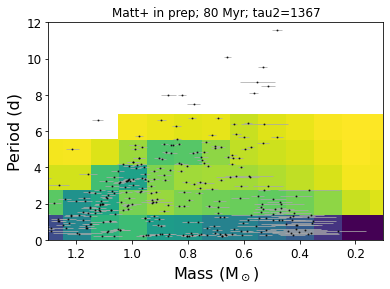

In [217]:
sm = SpinModel("WideHat8Myr_Mattea2022",80,"linear",
               init_type="kde")
pmd.select_obs(sm)

# Normalize the model and calculate tau-squared
# sm.normalize()
sm.add_mask()
sm.calc_tau_sq(pmd)

# Plot
ax = sm.plot_hist()
pmd.plot_obs(ax)
ax.set_ylim(0,12)
ax.set_title(f"Matt+ in prep; 80 Myr; tau2={sm.tau_sq:.0f}")
plt.savefig(f"plots/tausq_WideHat8Myr_Mattea2022_{pmd.param_string}_linear_00080Myr_ZAMS.png",bbox_inches="tight",dpi=600)

like = np.exp(-0.5*sm.tau_sq)
print(f"likelihood {like}")

# Use the models to generate a theoretical pmd

init_type KDE; normalization already completed
[[0.472296645642515 0.3342009722740685 0.19724179284756133
  0.11264249428695482 0.07543292323568371 0.04536022670454247
  0.03525016773020667 -- -- -- -- -- 0.28190383027169835]
 [0.04344419766787417 0.08561169178612572 0.0698034808765956
  0.04537212146588999 0.02227549835227973 0.013729042631884866
  0.008490911797787012 0.017238039789180454 -- -- -- --
  0.21862688285394005]
 [0.013949086724915818 0.042325588076742755 0.04347810360140589
  0.029781692892419734 0.015478816964130214 0.008019068521555386
  0.005671507618502913 0.0037472495843868694 -- -- -- 0.2721333380487362
  0.04310983617218675]
 [0.007068961331793199 0.023471869955839497 0.031746207500145104
  0.02384189314880169 0.011527510818795727 0.005628240634372909
  0.004477505895168717 0.003634070745703118 -- -- -- 0.2744754989792646
  0.014051758394481762]
 [0.004162462561614605 0.01560562236392194 0.024241347738071753
  0.01855773301666251 0.009450124409665696 0.006847001475

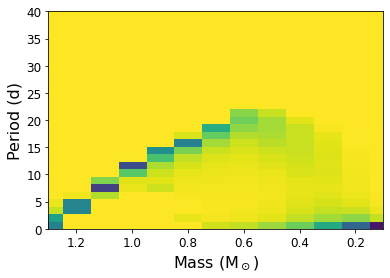

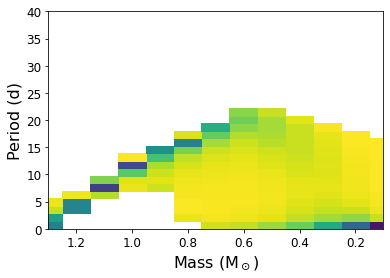

In [18]:
sm = SpinModel("WideHat8Myr_Mattea2022",742,"linear",init_type="kde")
sm.plot_hist()
sm.normalize()
sm.add_mask()
sm.plot_hist()
print(sm.img)

In [29]:
class PeriodMassModel(PeriodMassDistribution):
    # Replacing: __init__, calc_mass_percentiles (don't need to mc these)
    # Inheriting: select_obs, plot_obs, plot_period_perc

    def __init__(self,sm,mass_limits=None,n_select=100):
        """
        Inputs
        ------
        sm: SpinModel object
        mass_limits: tuple or list, minimum and maximum masses to include
        n_select: int, number of synthetic observations to generate (default 100)
                 n_select should be evenly divisible by the number of mass_bins for sm
                 otherwise fewer stars may be returned
        """
        
        # Generate the synthetic observation set
        self.sm = sm
        
        self.sm.normalize()
        
        self._generate_sample(n_select)
        
        # Apply mass limits if needed
#         if mass_limits is not None:
#             mass_select = (self.cat["Mass"]>=mass_limits[0]) & (self.cat["Mass"]<=mass_limits[1])
#             self.cat = self.cat[mass_select]

        # Assign the catalog values to attributes - these are fake here since we don't
        # need to exclude any of the modelled values
        n_actual = len(self.prot_raw)
        self.mass_err_raw = np.zeros(n_actual)
        self.prot_mask = np.zeros(n_actual,bool)
        self.mass_mask = np.zeros(n_actual,bool)

        # Assign masks for quality and presence of necessary values
        self.qmask = np.ones(n_actual,bool)
        self.n_select = n_actual

        self.figsize=(9,9)

        # TODO: include model parameters here
        self.param_string = f"model_"
        
    def _generate_sample(self,n_select):
        # TODO: this should incorporate a mass function
        
        # For now, just select an even number of stars in every mass bin
        
        # When the model is normalized, each mass bin has a period distribution
        # that should work as a probability distribution for np.random.choice
        
        rng = np.random.default_rng(37)
        
        nbins = len(self.sm.mass_bins)-1
        n_per_bin = n_select // nbins
        fake_periods = np.zeros(nbins*n_per_bin).reshape(nbins,n_per_bin)
        fake_masses = np.zeros(nbins*n_per_bin).reshape(nbins,n_per_bin)
        
        for i in range(nbins):
            bin_center = (self.sm.mass_bins[i]+self.sm.mass_bins[i+1])/2
            fake_masses[i,:] = bin_center
            
            
            # I think I can actually just draw from the prot array? I think the values
            # are already weighted...
#             prob_dist = self.sm.img[:,i]
#             print(prob_dist)
#             print(self.sm.prot_array)

            model_loc = ((self.sm.mass_array>=self.sm.mass_bins[i]) & 
                         (self.sm.mass_array<self.sm.mass_bins[i+1]))
            
            fake_periods[i] = rng.choice(a=self.sm.prot_array[model_loc],size=n_per_bin,
                                         replace=True,p=self.sm.prot_prob[model_loc])
            
        self.prot_raw = fake_periods.flatten()
        self.mass_raw = fake_masses.flatten()
        
        

    def calc_mass_percentiles(self,mass_bins,percentiles=[0,10,50,75,100],ntests=1000):
        
        self.percentiles = percentiles
               
        nmass = len(mass_bins)-1

        # Need to generate a set of percentiles for each mass bin
        nperc = len(self.percentiles)
        period_perc = np.zeros((nmass,nperc))

        for i in range(nmass):
            subset = (self.mass>=mass_bins[i]) & (self.mass<mass_bins[i+1])
            period_perc[i] = np.percentile(self.prot[subset],self.percentiles)

        self.period_perc = period_perc
        self.perc_mass_bins = mass_bins

        


In [32]:
pmm = PeriodMassModel(sm,n_select=500)
pmm.select_obs(sm)

init_type KDE; normalization already completed


In [33]:
pmm.calc_mass_percentiles(sm.mass_bins)
print(pmm.period_perc)

[[1.75977960e-02 3.40278190e-02 1.78816045e-01 6.58340630e-01
  1.38984910e+01]
 [3.87738630e-02 1.02983170e-01 5.49735455e-01 2.11599775e+00
  1.22606590e+01]
 [6.02664810e-02 2.63745257e-01 6.13582575e+00 1.18350422e+01
  1.74363410e+01]
 [3.36434070e-01 5.76470662e-01 6.33964400e+00 1.59564387e+01
  1.99448290e+01]
 [1.26690440e-01 1.53073808e+00 1.46977200e+01 1.75779413e+01
  2.06074060e+01]
 [2.05973030e-01 7.78143886e+00 1.65538940e+01 1.93166120e+01
  2.13241550e+01]
 [4.72283510e-01 6.22100974e+00 1.65735995e+01 1.83604367e+01
  1.91566020e+01]
 [2.18724480e+00 8.30506662e+00 1.46370430e+01 1.62240937e+01
  1.64741890e+01]
 [7.97461540e+00 1.05111716e+01 1.37169170e+01 1.40311603e+01
  1.45805280e+01]
 [7.93689840e+00 1.03639507e+01 1.14021425e+01 1.16456018e+01
  1.20739640e+01]
 [6.52370000e+00 7.06826132e+00 7.96845125e+00 8.24296232e+00
  8.76856010e+00]
 [3.67140140e+00 3.76955136e+00 4.14006185e+00 4.37812073e+00
  6.10626930e+00]
 [8.89578340e-01 9.86183681e-01 1.434041

494


<AxesSubplot:xlabel='Mass (M$_\\odot$)', ylabel='Period (d)'>

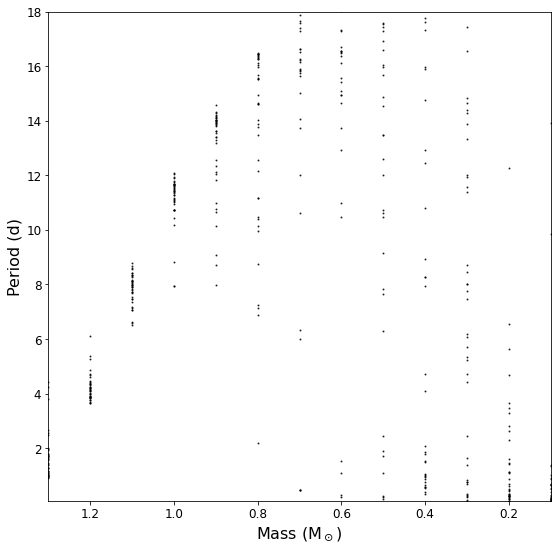

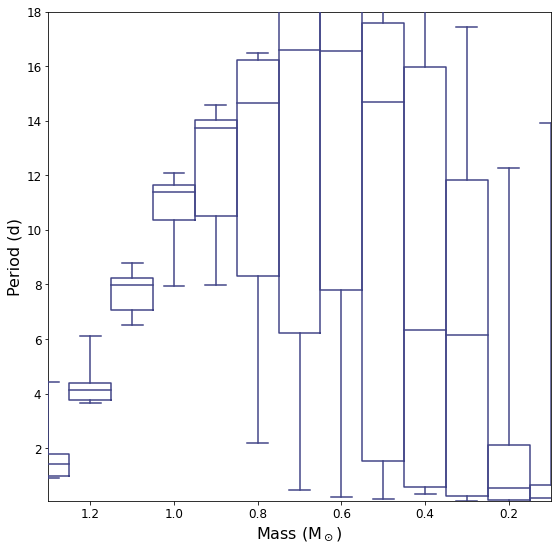

In [34]:
pmm.plot_obs()
print(pmm.n_select)
pmm.plot_period_perc()

In [35]:
sm.calc_tau_sq(pmm)

In [36]:
sm.tau_sq

2362.8659448934854